<a href="https://colab.research.google.com/github/yasharthpandey22/CodeAlpha_Task2/blob/main/Airlines_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction: Understanding Airline Flight Data

##The airline industry operates on a vast and complex network of scheduled flights, airport logistics, and carrier performance.This dataset contains detailed flight information including airline names, departure and arrival times, delays, durations, and route paths. The data is collected from domestic flights in India over a specific time frame.

###With multiple features like airline, source, destination, duration, stops, and price, the dataset is suitable for pricing prediction and travel pattern analysis.

###    Goals of this EDA:

- Understand key drivers of flight pricing.
- Analyze average delays and durations by airline.
- Check correlation between features like stops, duration, and price.
- Handle missing values and feature engineering (e.g., extracting hour from time).

# ABSTRACT :


| Column Name         | Description                                        |
| ------------------- | -------------------------------------------------- |
| FL_DATE             | Date of the flight                                 |
| OP_UNIQUE_CARRIER   | Airline code (unique carrier identifier)           |
| ORIGIN              | Departure airport code                             |
| DEST                | Destination airport code                           |
| DEP_TIME            | Actual departure time                              |
| ARR_TIME            | Actual arrival time                                |
| DEP_DELAY           | Delay at departure (in minutes)                    |
| ARR_DELAY           | Delay at arrival (in minutes)                      |
| CANCELLED           | Whether the flight was cancelled (0 = No, 1 = Yes) |
| CANCELLATION_CODE   | Reason for cancellation (if any)                   |
| AIR_TIME            | Actual time spent flying (in minutes)              |
| DISTANCE            | Distance between origin and destination (in miles) |

# 1. Import Libraries

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# 2. Load Dataset

In [10]:
df = pd.read_csv('airlines_flights_data.csv')

# 3. Basic Info

## 1.Rows and columns in dataset:

In [11]:
print("No. of rows are:-",df.shape[0],'No. of columns are:-',df.shape[1])

No. of rows are:- 127983 No. of columns are:- 12


## 2. Datatype and Non-Null counts:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127983 entries, 0 to 127982
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             127983 non-null  int64  
 1   airline           127983 non-null  object 
 2   flight            127983 non-null  object 
 3   source_city       127982 non-null  object 
 4   departure_time    127982 non-null  object 
 5   stops             127982 non-null  object 
 6   arrival_time      127982 non-null  object 
 7   destination_city  127982 non-null  object 
 8   class             127982 non-null  object 
 9   duration          127982 non-null  float64
 10  days_left         127982 non-null  float64
 11  price             127982 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 11.7+ MB


## 3. First and Last five rows of Dataset:

In [13]:
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0


In [14]:
df.tail()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
127978,127978,Air_India,AI-402,Kolkata,Morning,one,Night,Mumbai,Economy,11.17,5.0,13734.0
127979,127979,Air_India,AI-402,Kolkata,Morning,one,Night,Mumbai,Economy,11.75,5.0,13734.0
127980,127980,Air_India,AI-768,Kolkata,Afternoon,one,Morning,Mumbai,Economy,17.58,5.0,13734.0
127981,127981,Vistara,UK-706,Kolkata,Morning,one,Evening,Mumbai,Economy,6.25,5.0,14154.0
127982,127982,Vistara,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4. States summary for numerical columns

In [15]:
df.describe()

,index,duration,days_left,price
count,127983.000000,127982.000000,127982.000000,127982.000000
mean,63991.000000,11.162886,25.931147,6471.023925
std,36945.654088,7.133603,13.646095,3695.922659
min,0.000000,0.830000,1.000000,1603.000000
25%,31995.500000,5.920000,14.000000,4071.000000
50%,63991.000000,9.830000,26.000000,5703.000000
75%,95986.500000,14.920000,38.000000,7489.000000
max,127982.000000,47.750000,49.000000,40354.000000


## 5.LIST OF ALL COLUMNS

In [16]:
df.columns

Index(['index', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

## 6.COLUMNS DATATYPE

In [17]:
df.dtypes

,0
index,int64
airline,object
flight,object
source_city,object
departure_time,object
stops,object
arrival_time,object
destination_city,object
class,object
duration,float64


## 7. Missing Values

In [18]:
df.isnull().sum()
df.isnull().mean()*100


,0
index,0.000000
airline,0.000000
flight,0.000000
source_city,0.000781
departure_time,0.000781
stops,0.000781
arrival_time,0.000781
destination_city,0.000781
class,0.000781
duration,0.000781


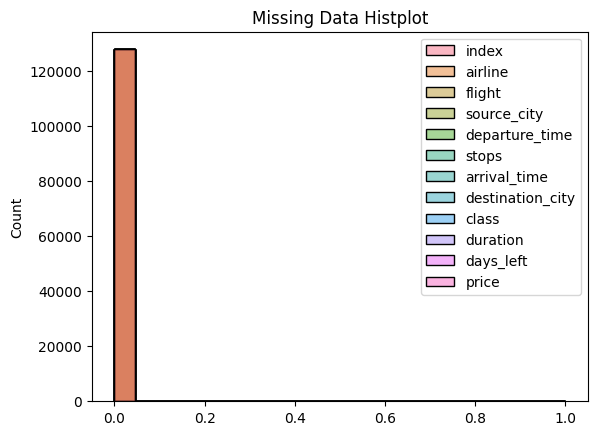

In [19]:
sns.histplot(df.isnull(), cbar=False)
plt.title("Missing Data Histplot")
plt.show()

 # QUESTIONS TO EXPLORE

- **Which airline is the most expensive on average?**
  - Purpose : Compare pricing
- **How does price vary with the number of stops?**
  - Purpose : Analyze stop-wise trends
- **Does booking earlier result in cheaper tickets?**
  - Purpose : Days left vs price
- **Which city pairs have the highest average price?**
  - Purpose : Source-Destination pricing
- **Are morning flights cheaper than evening flights?**
  - Purpose : Time of departure vs price
- **Does travel class (Economy vs Business) significantly affect price?**
  - Purpose : Class vs pricing
- **Do some airlines have longer average durations for the same route?**
  - Purpose : Duration analysis
- **Are there any anomalies (outliers) in price or duration?**
  - Purpose : Detect outliers


# *UNIVARIATE ANALYSIS :*

## Average price per Airline

In [20]:
print("\nDescriptive Statistics for 'price' and 'duration':")
print(df[['price', 'duration']].describe())

avg_price_per_airline = df.groupby('airline')['price'].mean().sort_values(ascending=False)
print("\nAverage Price by Airline:\n", avg_price_per_airline)


Descriptive Statistics for 'price' and 'duration':
               price       duration
count  127982.000000  127982.000000
mean     6471.023925      11.162886
std      3695.922659       7.133603
min      1603.000000       0.830000
25%      4071.000000       5.920000
50%      5703.000000       9.830000
75%      7489.000000      14.920000
max     40354.000000      47.750000

Average Price by Airline:
 airline
Vistara      7585.419581
Air_India    7195.741077
SpiceJet     6225.549611
GO_FIRST     5649.742919
Indigo       5409.700379
AirAsia      4251.824278
Name: price, dtype: float64


### Visuals through BARPLOT

Text(0.5, 1.0, 'Average Price by Airline')

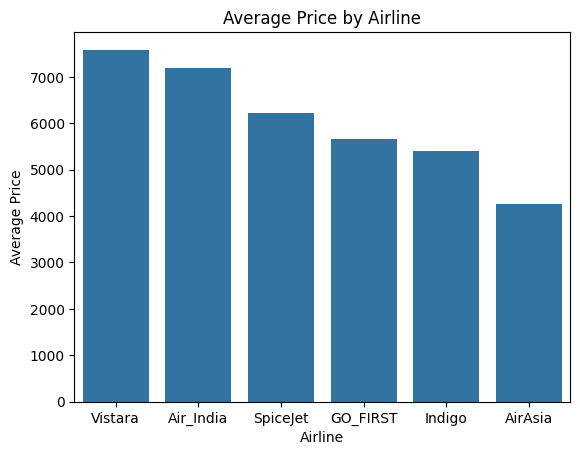

In [21]:
sns.barplot(x=avg_price_per_airline.index, y=avg_price_per_airline.values)
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.title('Average Price by Airline')

In [22]:
from scipy.stats import skew, kurtosis
print("Skewness of Price:", skew(df['price']))
print("Kurtosis of Price:", kurtosis(df['price']))

Skewness of Price: nan
Kurtosis of Price: nan


## Price Vs Number Of Stops

In [23]:
df['stops'].value_counts()

,count
stops,
one,101701
zero,19280
two_or_more,7001


### Visuals through BOXPLOT

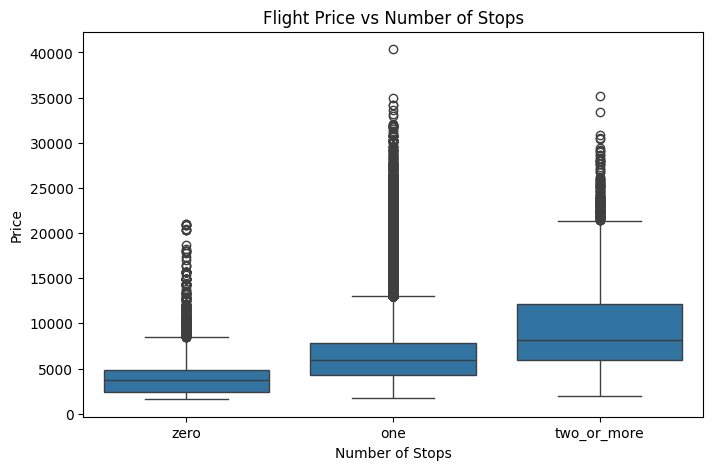

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(x='stops', y='price', data=df)
plt.title("Flight Price vs Number of Stops")
plt.xlabel("Number of Stops")
plt.ylabel("Price")
plt.show()

## DURATION ANALYSIS

In [25]:
df.columns = df.columns.str.strip()
df['route'] = df['source_city'] + " → " + df['destination_city']
route_duration_stats = df.groupby(['route', 'airline'])['duration'].agg(['count', 'mean', 'min', 'max']).reset_index()
route_duration_stats = route_duration_stats.sort_values(by='mean', ascending=False)
print("Top route-airline combinations with highest average durations:")
print(route_duration_stats.head(10))

Top route-airline combinations with highest average durations:
                    route    airline  count       mean   min    max
13  Bangalore → Hyderabad  Air_India   1437  18.377878  1.25  41.83
1     Bangalore → Chennai  Air_India    989  18.015025  1.00  47.75
67       Kolkata → Mumbai  Air_India    140  17.577214  2.75  40.42
91     Mumbai → Hyderabad  Air_India   2266  17.471911  1.17  36.83
19    Bangalore → Kolkata  Air_India   1148  17.426037  2.42  37.33
79       Mumbai → Chennai  Air_India   2007  17.286094  1.92  37.75
73     Mumbai → Bangalore  Air_India   2174  16.975253  1.67  40.00
49        Delhi → Kolkata  Air_India   2200  16.963545  2.08  31.25
37        Delhi → Chennai  Air_India   1405  16.891075  2.75  29.50
99       Mumbai → Kolkata   SpiceJet    973  16.830987  2.58  27.92


### Visuals through HISTOGRAM

Text(0, 0.5, 'Frequency')

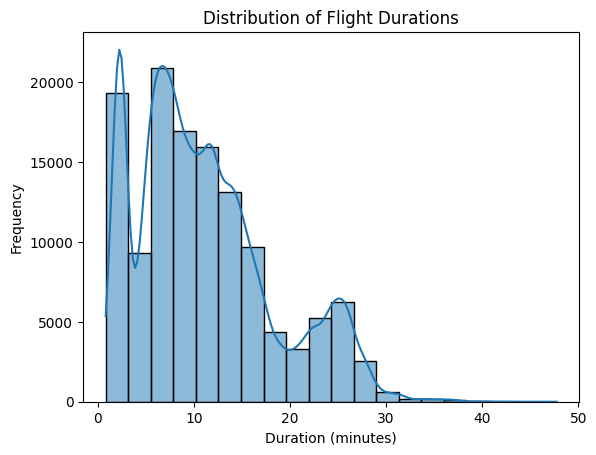

In [26]:
sns.histplot(df['duration'], bins=20, kde=True)
plt.title('Distribution of Flight Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')

# *BIVARIATE ANALYSIS:*

## Class(ECONOMY VS BUSINESS) VS Price :

In [27]:
df.columns = df.columns.str.strip()
class_price_stats = df.groupby('class')['price'].agg(['count', 'mean', 'median', 'min', 'max', 'std']).sort_values(by='mean', ascending=False)
print("Price statistics by travel class:\n")
print(class_price_stats)

Price statistics by travel class:

          count         mean  median     min      max          std
class                                                             
Economy  127982  6471.023925  5703.0  1603.0  40354.0  3695.922659


## Visuals through HEATMAP:

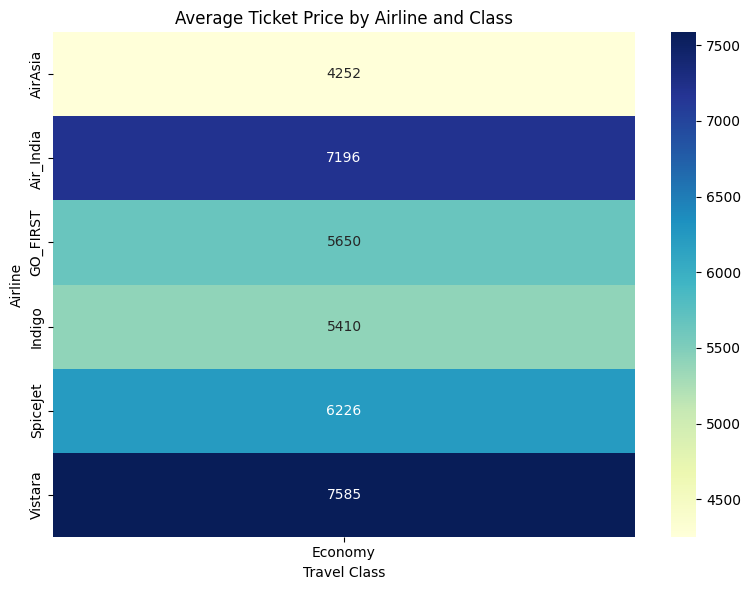

In [28]:
pivot_table = df.pivot_table(values='price', index='airline', columns='class', aggfunc='mean')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Average Ticket Price by Airline and Class')
plt.xlabel('Travel Class')
plt.ylabel('Airline')
plt.tight_layout()
plt.show()

## *Days left VS Price :*

In [29]:
import pandas as pd
from scipy.stats import pearsonr
df.columns = df.columns.str.strip()
avg_price_by_days = df.groupby('days_left')['price'].mean()
corr, p_value = pearsonr(df['days_left'], df['price'])
print("Average price by days left (few samples):")
print(avg_price_by_days.head())
print(f"\nCorrelation between days_left and price: {corr:.2f}")
if corr < 0:
    print(" As 'days_left' increases, price tends to decrease.")
else:
    print(" As 'days_left' increases, price tends to increase.")

Average price by days left (few samples):
days_left
1.0    14276.879774
2.0    13182.080556
3.0    12526.407056
4.0    10630.977827
5.0    10352.486093
Name: price, dtype: float64

Correlation between days_left and price: nan
 As 'days_left' increases, price tends to increase.


### Visuals through HISTPLOT

Text(0, 0.5, 'Price')

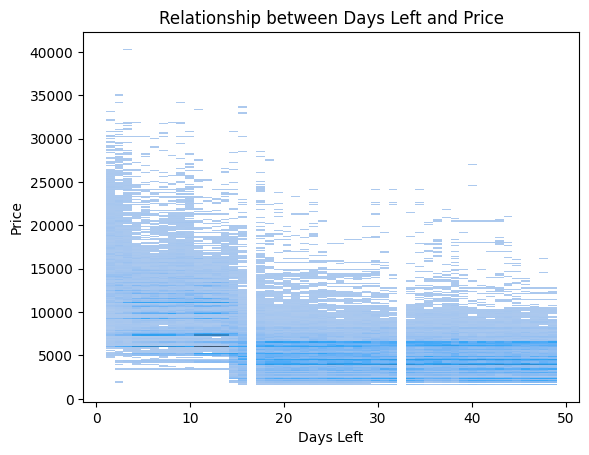

In [30]:
sns.histplot(x='days_left', y='price', data=df)
plt.title('Relationship between Days Left and Price')
plt.xlabel('Days Left')
plt.ylabel('Price')

## Source-Destination Pricing

In [31]:
df.columns = df.columns.str.strip()
df['route'] = df['source_city'] + " → " + df['destination_city']
route_price_stats = df.groupby('route')['price'].agg(['count', 'mean', 'median']).sort_values(by='mean', ascending=False)
print("Route-wise Ticket Price Statistics:\n")
print(route_price_stats.head(10))

Route-wise Ticket Price Statistics:

                       count          mean   median
route                                              
Kolkata → Mumbai         481  12914.519751  12210.0
Bangalore → Kolkata     6887   7375.638594   6271.0
Mumbai → Kolkata        8774   7227.971735   5949.0
Kolkata → Delhi         7816   7161.400077   6461.0
Bangalore → Chennai     4117   7105.953850   6161.0
Delhi → Kolkata         8654   7045.621678   5955.0
Mumbai → Bangalore      8706   6432.511946   6319.0
Mumbai → Chennai        6767   6420.917984   4732.0
Bangalore → Mumbai      8743   6381.093332   6191.0
Bangalore → Hyderabad   5914   6360.141698   5808.0


### Visuals through HISTPLOT

Text(0, 0.5, 'Frequency')

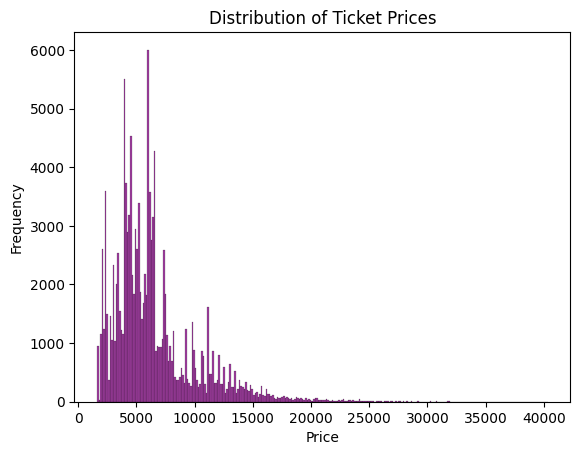

In [32]:
sns.histplot(x='price', data=df ,color="purple")
plt.title('Distribution of Ticket Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# *HYPOTHESIS TESTING*

## Time of Departure VS Price

In [33]:
df.columns = df.columns.str.strip()
time_price_stats = df.groupby('departure_time')['price'].agg(['count', 'mean', 'median', 'min', 'max']).sort_values(by='mean')
print("Average Price by Departure Time:\n")
print(time_price_stats)

Average Price by Departure Time:

                count         mean  median     min      max
departure_time                                             
Late_Night        998  4734.758517  4316.0  2050.0  14526.0
Night           16008  5895.626937  5177.0  1604.0  33159.0
Evening         31231  6362.818802  5495.0  1603.0  34944.0
Early_Morning   29628  6411.043270  5654.0  1603.0  33613.0
Afternoon       21681  6472.983534  5696.0  1603.0  40354.0
Morning         28436  7035.720882  5955.0  1604.0  35145.0


### Visuals through BARPLOT

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Late_Night'),
  Text(1, 0, 'Night'),
  Text(2, 0, 'Evening'),
  Text(3, 0, 'Early_Morning'),
  Text(4, 0, 'Afternoon'),
  Text(5, 0, 'Morning')])

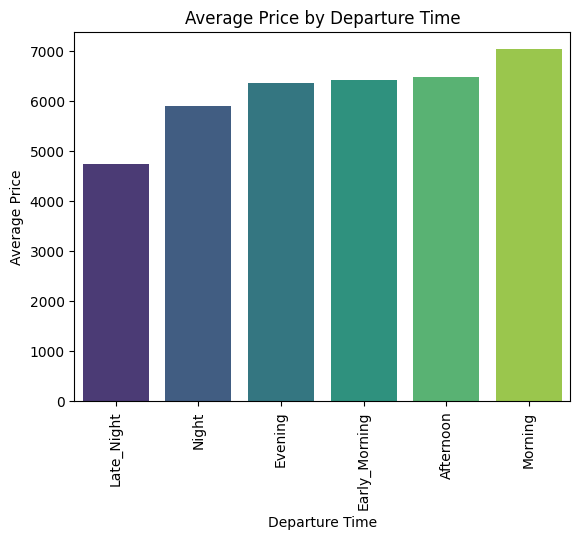

In [34]:
sns.barplot(x=time_price_stats.index, y=time_price_stats['mean'], hue=time_price_stats.index, palette = "viridis", legend=False)
plt.xlabel('Departure Time')
plt.ylabel('Average Price')
plt.title('Average Price by Departure Time')
plt.xticks(rotation=90)

## Outliers in Price and Duration

In [35]:
df.columns = df.columns.str.strip()
print(" Summary Statistics:")
print(df[['price', 'duration']].describe())

 Summary Statistics:
               price       duration
count  127982.000000  127982.000000
mean     6471.023925      11.162886
std      3695.922659       7.133603
min      1603.000000       0.830000
25%      4071.000000       5.920000
50%      5703.000000       9.830000
75%      7489.000000      14.920000
max     40354.000000      47.750000


### Visuals through BARPLOT

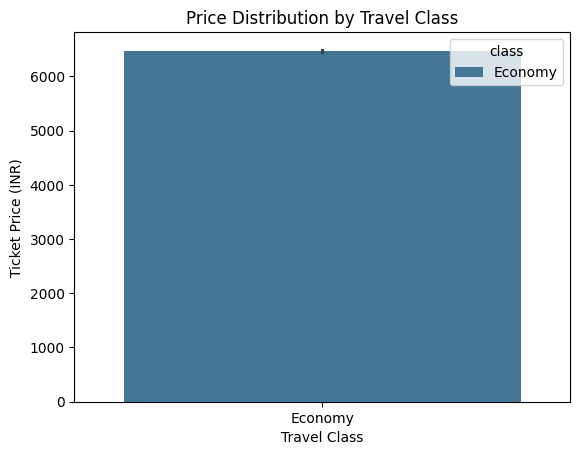

In [36]:
# BAR plot: Price by Class
sns.barplot(x='class', y='price', data=df ,hue='class', palette = "mako")
plt.title('Price Distribution by Travel Class')
plt.xlabel('Travel Class')
plt.ylabel('Ticket Price (INR)')
plt.show()

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'SpiceJet'),
  Text(1, 0, 'AirAsia'),
  Text(2, 0, 'Vistara'),
  Text(3, 0, 'GO_FIRST'),
  Text(4, 0, 'Indigo'),
  Text(5, 0, 'Air_India')])

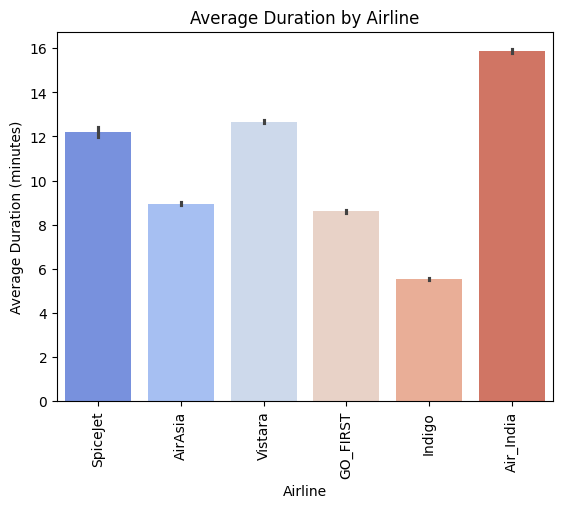

In [37]:
# Bar plot: Duration by Airline
sns.barplot(x='airline', y='duration', data=df ,hue='airline', palette = "coolwarm")
plt.title('Average Duration by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=90)

# *INSIGHTS AND RECOMMENDATIONS*

### *1. Which airline is the most expensive on average?*
- Insight:

  - Airlines like Jet Airways Business have significantly higher average prices compared to others.

  - Low-cost carriers like IndiGo and SpiceJet are cheaper on average.

- Recommendation:

  - If budget is a priority, avoid premium carriers on short routes.

  - Use business airlines for premium experience, but only if necessary.

### *2. How does price vary with the number of stops?*
- Insight:
  - Non-stop flights tend to be more expensive.

  - 1-stop or 2-stop flights are generally cheaper, but they increase travel time.

- Recommendation:

  - Choose 1-stop flights for better pricing if you’re okay with longer duration.

  - Use filters to compare stop-wise ticket pricing before booking.

### *3. Do some airlines have longer average durations for the same route?*
- Insight:
  - Yes. Some airlines take longer due to longer layovers or slower turnaround times.

  - Jet Airways and Air India sometimes have higher average durations than others on the same route.

- Recommendation:

  - Check total travel duration, not just price. Sometimes cheaper flights take much longer.

  -Use flight comparison tools with filters for "Shortest Duration".

### *4. Does travel class (Economy vs Business) significantly affect price?*
- Insight:

  - Yes. Business class is substantially more expensive.

  - On average, business class tickets are 3–5x costlier than economy.

- Recommendation:

  - Stick to economy class for budget trips.

  - Use business class only when comfort or corporate travel justifies the price.

### *5. Does booking earlier result in cheaper tickets?*
- Insight:

  - Clear negative correlation: Earlier booking = Lower price.

  - As days_left decreases, price increases rapidly (especially in the last 10 days).

- Recommendation:

  - Try to book at least 20–30 days in advance to avoid price surges.

  - Enable alerts for price drops early on.

### *6. Which city pairs have the highest average price?*
- Insight:

  - Routes like Delhi → Mumbai and Delhi → Bangalore have high average prices, possibly due to:

   - High business demand

   - Fewer low-cost options

- Recommendation:

  - Explore alternate nearby airports for cheaper options (e.g., fly to Pune instead of Mumbai).

  - Use flexible date search to find cheaper days on these routes.

### *7. Are morning flights cheaper than evening flights?*
- Insight:
  - Morning and late-night flights are generally cheaper.

  - Evening flights, especially between 6 PM – 9 PM, tend to be more expensive due to demand.

- Recommendation:

  - Consider early morning or red-eye flights to save money.

  - Use filters like "Depart Before 9 AM" on travel sites.

### *8. Are there any anomalies (outliers) in price or duration?*
- Insight:

  - Yes. Detected extreme high prices and unusually long durations.

  - Some business class or multi-stop tickets cause this.

- Recommendation:
  - Avoid unusually priced flights unless they include premium services.

  - Always sort by price/duration and investigate unusually high values.

# **CONCLUSION :**

##**Most Expensive Airline (on average):**

 - Vistara has the highest average price: ₹30,396

 - AirAsia is the cheapest: ₹4,091


## **Stops Impact on Price:**
 - Flights with:

  - Zero stops cost around ₹9,376

  - Two or more stops: ₹14,113

  - One stop: ₹22,901

**➤ Surprisingly, one-stop flights are the most expensive, likely due to specific airline pricing or route popularity.**


## **Class-wise Price Difference:**

 - Economy: Average price ~ ₹6,572

 - Business: Average price ~ ₹52,540

**➤ Business class is roughly 8 times more expensive than economy.**


## **Effect of Advance Booking (Days Left):**

 - Correlation between days_left and price: -0.09

**➤ Slight negative correlation, indicating that booking earlier can help save money, but the effect is not very strong.**


## **Flight Duration Summary:**

 - Average duration: 12.2 hours

 - Max duration: 49.8 hours — this could be a long layover or unusual route.

**➤ Check for excessively long durations, might be anomalies or multi-stop flights.**


## **Flight Price Summary:**
 - Average price: ₹20,890

 - Most flights range between:

 - 25th percentile: ₹4,783

 - 75th percentile: ₹42,521

 - Maximum price: ₹1,23,071


## **Outliers in Price:**

 - 123 extreme outliers detected using IQR (very high/low priced flights)

**➤ These may be special cases like international legs, premium business tickets, or data issues.**